# analysis of judges

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

## import data

In [2]:
judges_clean= pd.read_csv('judges_clean.csv')

# analysis on the dataset

In [3]:
judges_clean.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


### data preprocessing

encoding where possible - female_judge

In [4]:
judges_clean['female_judge'].value_counts()

female_judge
0 nonfemale      67540
1 female         27202
-9998 unclear     3735
Name: count, dtype: int64

since the female_judge columns gives details on whether the judge is male or female or unclear gender, the column can be encoded to numerical values without any string.

- 0- male
- 1- female
- drop rows with gender unclear

In [5]:
# extract rows where female_judge is NOT  unclear
judges_clean = judges_clean [judges_clean['female_judge']!= '-9998 unclear']

In [6]:
judges_clean

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019


### missing values analysis

In [7]:
judges_clean.isna().sum()

ddl_judge_id          0
state_code            0
dist_code             0
court_no              0
judge_position        0
female_judge          1
start_date            0
end_date          17691
dtype: int64

several rows are missing the end data, and on looking at the dataset, the start dates in such cases are of recent years and therefore there is a possibility that the missing end_date is since the judges are still serving their tenure
this can be used to gain insight on the current judges

In [8]:
current_judge = judges_clean[judges_clean['end_date'].isnull()]
current_judge

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
5,6,1,1,1,chief judicial magistrate,1 female,09-07-2018,NaN
18,19,1,1,1,civil judge junior division,0 nonfemale,05-06-2017,NaN
22,23,1,1,1,civil judge junior division,0 nonfemale,01-09-2017,NaN
23,24,1,1,1,civil judge junior division,0 nonfemale,04-06-2018,NaN
24,25,1,1,1,civil judge junior division,0 nonfemale,28-06-2018,NaN
...,...,...,...,...,...,...,...,...
98453,98454,30,2,6,criminal cases,0 nonfemale,29-04-2016,NaN
98462,98463,30,2,7,criminal cases,0 nonfemale,29-05-2017,NaN
98469,98470,30,2,7,district and sessions court,0 nonfemale,31-12-2018,NaN
98472,98473,30,2,8,criminal cases,0 nonfemale,15-12-2016,NaN


on dropping the missing values, we will be left with all the past judges details

In [9]:
past_judges= judges_clean.dropna()

### analysis of current judges 

a pie chart which depicts the gender distribution of the current judges

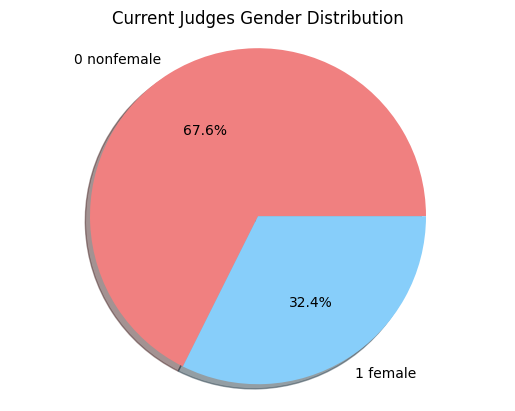

In [10]:
# Create a pie chart
labels = ['0 nonfemale', '1 female']
sizes = [current_judge['female_judge'].value_counts()[0], current_judge['female_judge'].value_counts()[1]]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal') 
plt.title('Current Judges Gender Distribution')
plt.show()


from the above pie chart, it is clear that it is primarily a male dominated field with 2/3rd of the judges male

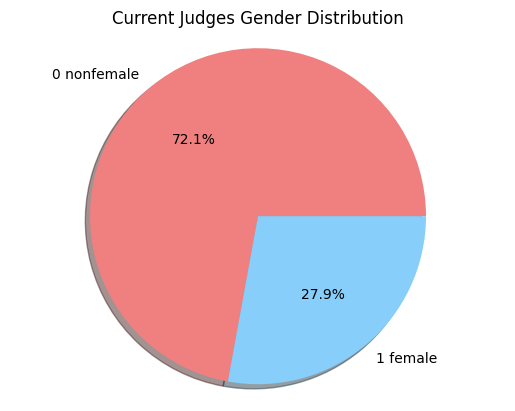

In [11]:
# Create a pie chart
labels = ['0 nonfemale', '1 female']
sizes = [past_judges['female_judge'].value_counts()[0], past_judges['female_judge'].value_counts()[1]]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal') 
plt.title('Current Judges Gender Distribution')
plt.show()


the above pie chart shows the gender distribution of the judges in the past.
the gender distribution among the current judges is significantly better than before with more female judges in position

- after analyzing the overall male and female judges distribution, we can look at the difference in the number of male and female judges statewise
- in the cases_state_key csv files, for every state_code we have a corresponding state name. we can use this to get the state name for our analysis
- we'll use past judges as well as current judges for this

In [12]:
state_map= pd.read_csv('keys/cases_state_key.csv')
state_mapping = state_map.set_index('state_code')['state_name'].to_dict()

judges_clean['state_name'] = judges_clean['state_code'].map(state_mapping)

In [13]:
state_grouped = judges_clean.groupby('state_name')['female_judge'].value_counts().unstack(fill_value=0)

In [14]:
state_grouped

female_judge,0 nonfemale,1 female
state_name,,
Andhra Pradesh,2266,1226
Assam,937,613
Bihar,3846,275
Chandigarh,89,51
Chhattisgarh,688,344
Delhi,943,514
Goa,160,164
Gujarat,2700,2249
Haryana,1497,824


<Axes: title={'center': 'State-wise distribution'}, xlabel='State Name', ylabel='Count of judges'>

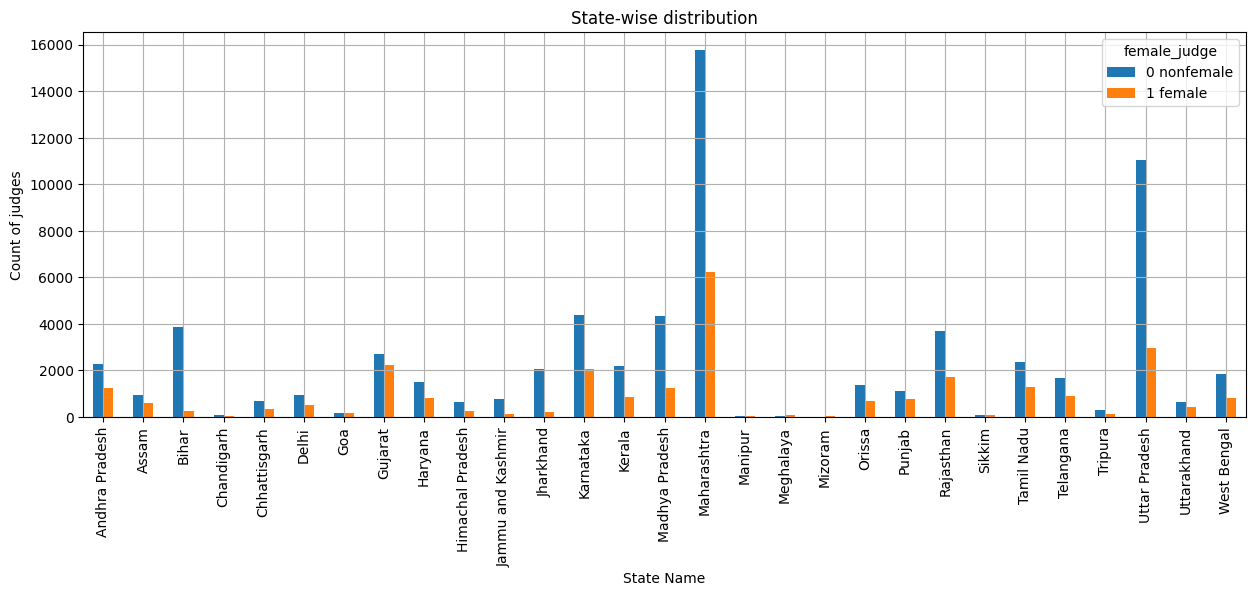

In [15]:
state_grouped.plot(kind='bar', title='State-wise distribution', ylabel='Count of judges',
         xlabel='State Name', figsize=(15, 5), grid=True)

- the above graph gives the overall gender distribution across the states
- we can see that Maharashtra state has the highest number of judges (total and even individually in the male and female judges demographics)
- in the smaller states, union territories, and the north eastern states, the number of judges is very less compared to the other states and are not clearly visible in the graph
- in order to visualize the count in such states, we can filter out the states where the male judge population is less than 2000 and visualize them in a bar graph

In [16]:
filtered_df = state_grouped.loc[state_grouped['0 nonfemale']<2000]

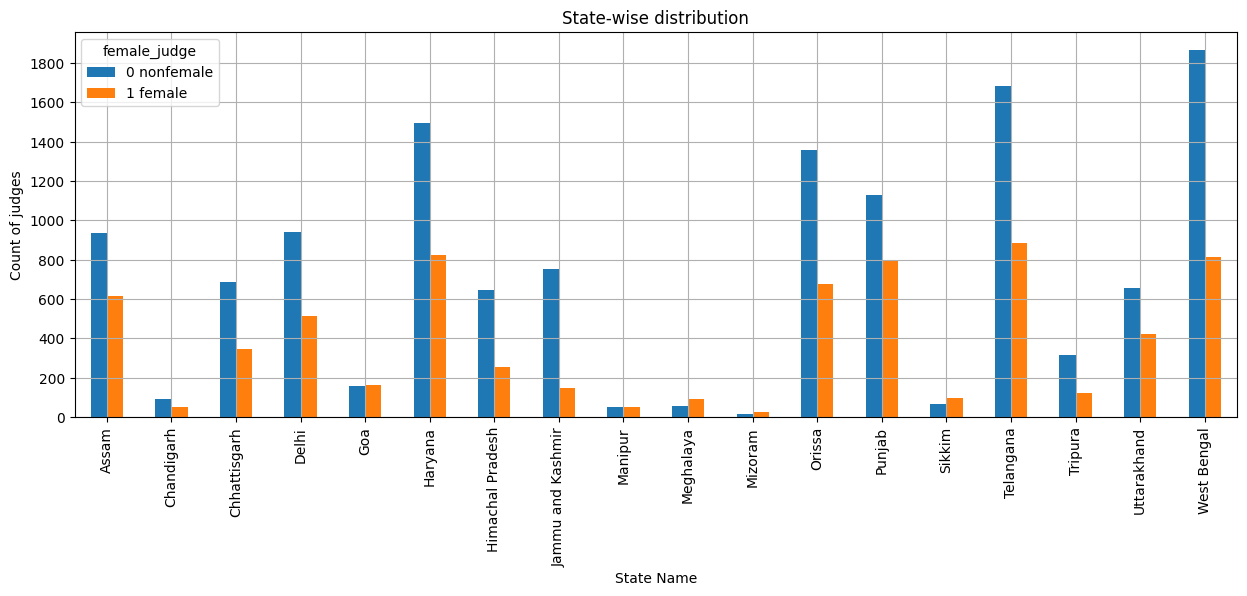

In [17]:
ax= filtered_df.plot(kind='bar', title='State-wise distribution', ylabel='Count of judges',
         xlabel='State Name', figsize=(15, 5), grid=True)

ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=10))
plt.show()

- we can now analyze the tenure of the judges to get the average years of the judges tenure and compare it with the average of male judges and female judges

In [18]:
past_judges.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018


In [19]:


def date_obj(row, attr):
    date= row[attr]
    date=datetime.strptime(date, "%d-%m-%Y")
    return date


past_judges['start_date'] = past_judges.apply(lambda row : date_obj(row, 'start_date'), axis=1)
past_judges['end_date'] = past_judges.apply(lambda row : date_obj(row, 'end_date'), axis=1)

In [20]:
past_judges['tenure']= past_judges['end_date'] - past_judges['start_date']

In [21]:
past_judges.head()

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date,tenure
0,1,1,1,1,chief judicial magistrate,0 nonfemale,2013-09-20,2014-02-20,153 days
1,2,1,1,1,chief judicial magistrate,0 nonfemale,2013-10-31,2014-02-20,112 days
2,3,1,1,1,chief judicial magistrate,0 nonfemale,2014-02-21,2016-05-31,830 days
3,4,1,1,1,chief judicial magistrate,0 nonfemale,2016-06-01,2016-06-06,5 days
4,5,1,1,1,chief judicial magistrate,0 nonfemale,2016-06-06,2018-07-07,761 days


In [22]:
average_days = past_judges['tenure'].mean()

In [23]:
average_days_by_gender = past_judges.groupby('female_judge')['tenure'].mean()

In [24]:
average_days_by_gender.head(), average_days

(female_judge
 0 nonfemale   420 days 03:59:04.293502704
 1 female      395 days 22:29:24.291701596
 Name: tenure, dtype: timedelta64[ns],
 Timedelta('413 days 09:55:22.376088564'))

Text(0, 0.5, 'No. of days')

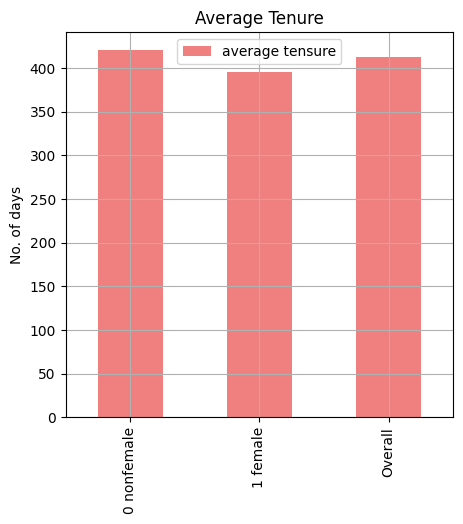

In [25]:
plotdata = pd.DataFrame({"average tensure":[420, 395, 413]}, index=["0 nonfemale", "1 female", "Overall"])
plotdata.plot(kind="bar",figsize=(5, 5), color='lightcoral', grid=True)
plt.title("Average Tenure")
plt.ylabel("No. of days")

- the average tenures of both the genders is similar to the overall average. 

In [26]:
judge_pos = past_judges.groupby(['judge_position', 'female_judge']).size().unstack(fill_value=0)

In [27]:
judge_pos.head()

female_judge,0 nonfemale,1 female
judge_position,,
1-additional additional district judge,2,0
1-additional chief judicial magistrate,81,5
1-additional civil judge and judicial magistrate,34,12
1-additional civil judge junior division,4,2
1-additional district and sessions court,24,2


In [28]:
len(judge_pos)

503

- since there are many positions with less than 50 judges occupying it, we'll set a minimum of 50 female judges for a position to be considered

In [29]:
judge_pos = judge_pos.loc[judge_pos['1 female']>50]
judge_pos

female_judge,0 nonfemale,1 female
judge_position,,
2-jmfc,77,56
additional chief judicial magistrate,1092,563
additional district and sessions court,1233,149
additional district judge,1065,141
chief judge court,145,51
chief judicial magistrate,7440,4129
chief metropolitan magistrate,757,494
city civil and sessions court,782,541
civil court,2525,1152


In [30]:
len(judge_pos)

31

- through this, the number of positions goes down from 503 to only 31
- we can now look at the distribution of male and female judges for each of these positions

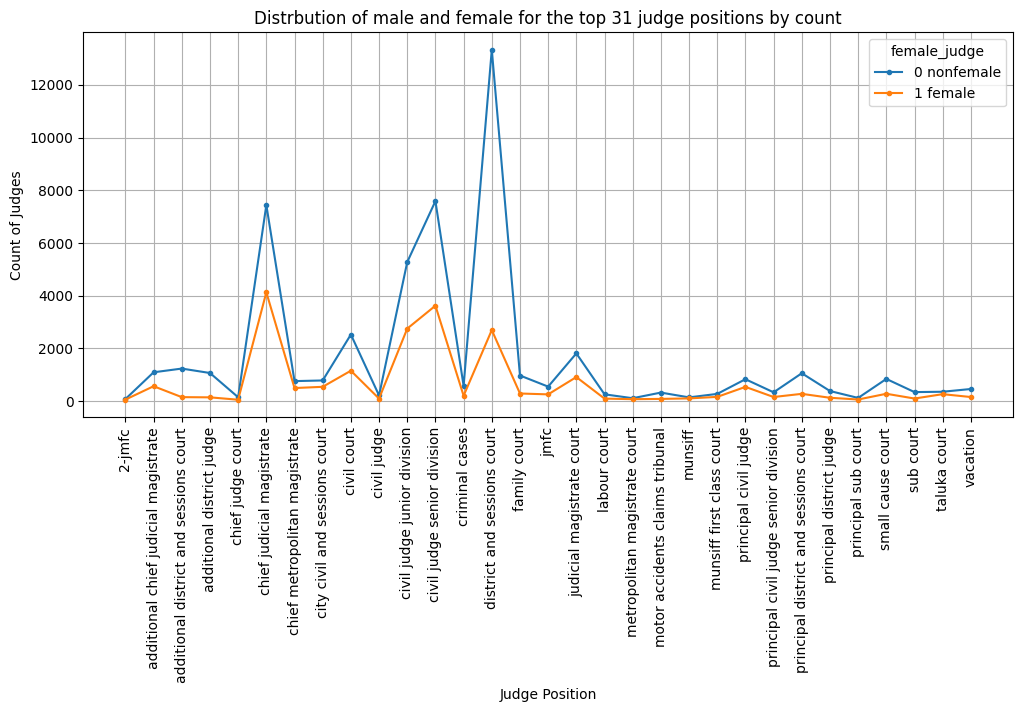

In [31]:
judge_pos.plot(kind='line', rot='vertical', figsize=(12,5), marker='.', grid=True)
plt.xticks(range(0,len(judge_pos.index)), judge_pos.index)
plt.xlabel('Judge Position')
plt.ylabel('Count of Judges')
plt.title('Distrbution of male and female for the top 31 judge positions by count')
plt.show()
